In [40]:
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [5]:
X=breast_cancer.data
Y=breast_cancer.target

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [1]:
class perceptron:
    def __init__(self):
        self.w=None
        self.b=None
    def model(self,x):
        return 1 if (np.dot(self.w,x)>=self.b) else 0
    def predict(self,X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
    def fit(self,X,Y):
        
        # initialize
        self.w=np.ones(X.shape[1])
        self.b=0
        
        for x,y in zip(X,Y):
            y_pred=self.model(x)
            if y==1 and y_pred==0:
                self.w=self.w+x
                self.b=self.b+1
            elif y==0 and y_pred==1:
                self.w=self.w-x
                self.b=self.b-1
            

In [75]:
class perceptron:
    def __init__(self):
        self.w=None
        self.b=None
    def model(self,x):
        return 1 if (np.dot(self.w,x)>=self.b) else 0
    def predict(self,X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
    def fit(self,X,Y, epoch=1,lr=1):
        
        # initialize
        self.w=np.ones(X.shape[1])
        self.b=0
        
        accuracy=[]
        max_accuracy=0
        wt_matrix=[]
        
        for i in range(epoch):
            for x,y in zip(X,Y):
                y_pred=self.model(x)
                if y==1 and y_pred==0:
                    self.w=self.w+lr*x
                    self.b=self.b+lr*1
                elif y==0 and y_pred==1:
                    self.w=self.w-lr*x
                    self.b=self.b-lr*1
                    
            wt_matrix.append(self.w)
            
            accuracy.append(accuracy_score(self.predict(X),Y))
            if (accuracy[i]>max_accuracy):
                max_accuracy=accuracy[i]
                chkpt_w=self.w
                chkpt_b=self.b
        self.w=chkpt_w
        self.b=chkpt_b
        print(max_accuracy)
        plt.plot(accuracy)
        plt.ylim([0,1])
        plt.show()
        return np.array(wt_matrix)
            


In [76]:
Perceptron=perceptron()

0.9272300469483568


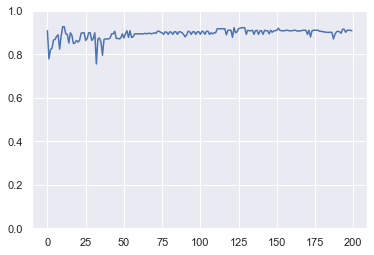

In [77]:
wt_matrix=Perceptron.fit(X_train,Y_train,epoch=200,lr=1)

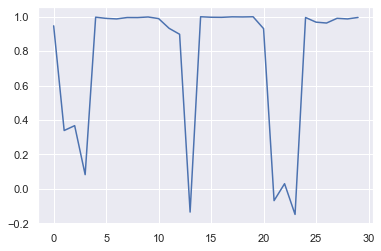

In [60]:
import matplotlib.pyplot as plt
plt.plot(Perceptron.w)
plt.show()

In [78]:
wt_matrix.shape

(200, 30)

In [61]:
from sklearn.metrics import accuracy_score
Y_pred=Perceptron.predict(X_train)
print('acc',accuracy_score(Y_pred,Y_train))

acc 0.931924882629108


In [62]:
Y_pred=Perceptron.predict(X_test)
print('acc',accuracy_score(Y_pred,Y_test))

acc 0.8951048951048951


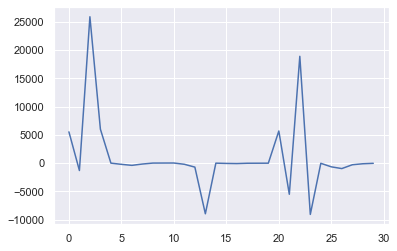

In [80]:
plt.plot(wt_matrix[-1,:])

## Matplotlib Annimation

In [63]:
%matplotlib inline

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

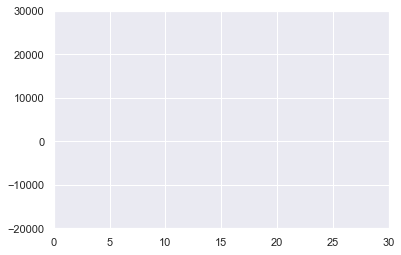

In [81]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-20000, 30000))

line, = ax.plot([], [], lw=2)

In [82]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [85]:
# animation function. This is called sequentially
def animate(i):
    x = range(0,wt_matrix.shape[1])
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [86]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, 
                               frames=100, interval=20, blit=True)

In [103]:
from IPython.display import HTML
HTML(anim.to_jshtml())